In [22]:
import link_bot_classifiers
from link_bot_data.new_classifier_dataset import NewClassifierDataset
from link_bot_data.image_classifier_dataset import ImageClassifierDataset
from link_bot_planning.params import LocalEnvParams
from link_bot_classifiers.visualization import plot_classifier_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import json

plt.style.use("slides")
np.set_printoptions(suppress=True, linewidth=250)

In [23]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)
config = tf.compat.v1.ConfigProto(gpu_options=gpu_options)
tf.compat.v1.enable_eager_execution(config=config)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [30]:
n_batch = 1

dataset_dirs = [pathlib.Path("classifier_data/new_obs_plan_7374a8679a_obs-cnn1-classifier/")]
test_dataset = NewClassifierDataset(dataset_dirs)
test_tf_dataset = test_dataset.get_datasets(mode='val',
                                            shuffle=False,
                                            seed=0,
                                            batch_size=n_batch,
                                            balance_key=None)

###############
# Model
###############
checkpoint = pathlib.Path("log_data/1conv_3x3/January_19_14-26-57_91981ec697")
model_hparams = json.load((checkpoint / 'hparams.json').open('r'))
module = link_bot_classifiers.get_model_module(model_hparams['model_class'])
net = module.model(model_hparams, batch_size=n_batch)

sequence length not specified, assuming hparams sequence length: 50


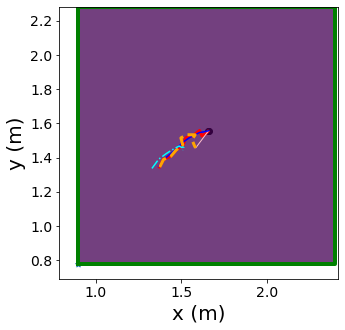

[1.3735628 1.344833  1.3969382 1.3886157 1.4397701 1.4078732 1.4708256 1.4442228 1.5110528 1.4722545 1.5285258 1.5162427 1.5706614 1.5281298 1.6080008 1.557865  1.6217761 1.5257406 1.6508257 1.545119  1.6576599 1.5524329]


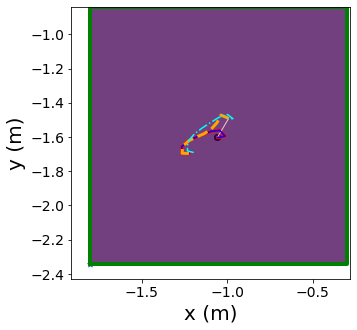

[-1.2227488 -1.6966603 -1.2634958 -1.6980292 -1.2650703 -1.6567571 -1.2295293 -1.6251794 -1.1849487 -1.6028466 -1.1385645 -1.5843427 -1.0918372 -1.5667925 -1.0425568 -1.5613755 -1.0117512 -1.595012  -1.0465379 -1.602464  -1.056532  -1.6022308]


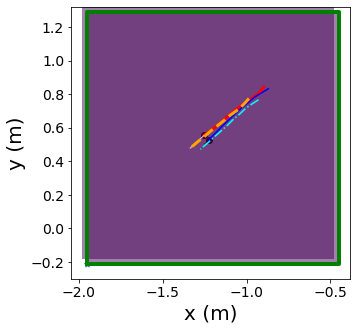

[-0.8979933   0.8417417  -0.9290135   0.80362844 -0.9696651   0.77482    -1.0113126   0.7471067  -1.0505219   0.71608764 -1.0907199   0.68635607 -1.1285094   0.6536712  -1.1662422   0.6208485  -1.2050306   0.5893033  -1.2456269   0.56013733
 -1.2538339   0.55441827]


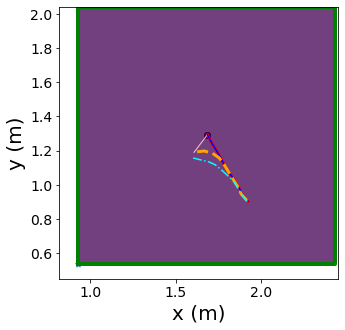

[1.9209111 0.9037348 1.8907709 0.9414787 1.8677882 0.9851788 1.8433609 1.0286834 1.8125482 1.0679324 1.785747  1.1100024 1.763748  1.1548852 1.7383668 1.1978749 1.7120036 1.2403617 1.688277  1.2843593 1.6836754 1.2932361]


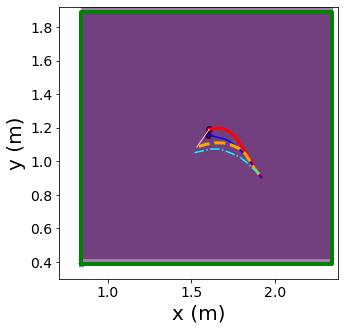

[1.9142125  0.90960836 1.8822309  0.9456652  1.8612036  0.98995805 1.8348763  1.0321976  1.808251   1.0744933  1.7824324  1.1172768  1.7529842  1.157566   1.7122773  1.1855729  1.664324   1.1982439  1.6153148  1.1920377  1.6055051  1.1900116 ]


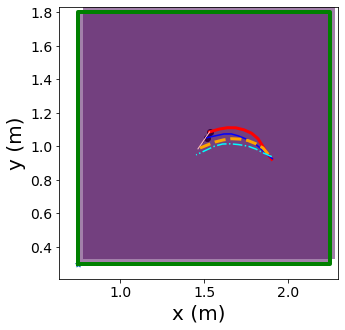

[1.9027526 0.9218865 1.8728311 0.9604199 1.8471612 1.0029533 1.8202277 1.0450729 1.7824495 1.0771521 1.7370385 1.0975602 1.6885157 1.1093439 1.6387017 1.1100689 1.589445  1.1018386 1.5413843 1.0880532 1.5318127 1.0850893]


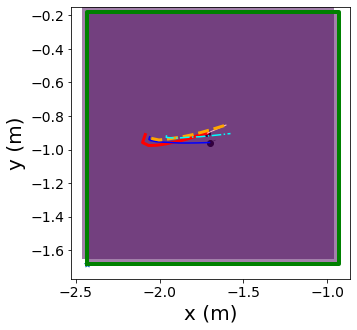

[-2.0853243  -0.91088694 -2.1014671  -0.9582359  -2.065371   -0.97586983 -2.015731   -0.97414047 -1.9661976  -0.96708965 -1.9172332  -0.9568127  -1.8683902  -0.9460107  -1.8200625  -0.93308395 -1.7725543  -0.9172943  -1.7242037  -0.904486
 -1.7144852  -0.90210736]


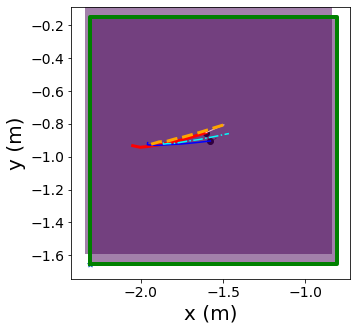

[-2.0491414  -0.93331474 -2.0032923  -0.94302577 -1.9536802  -0.9375686  -1.9041756  -0.930336   -1.8548257  -0.92218834 -1.8058823  -0.9119361  -1.7575005  -0.8993697  -1.7093133  -0.8858941  -1.6613034  -0.8718101  -1.6135212  -0.8569538
 -1.6039628  -0.85397744]


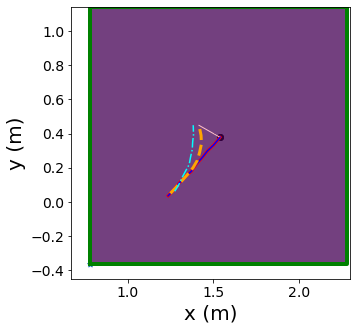

[1.2361239  0.03618997 1.2706022  0.0722314  1.3013991  0.11162572 1.3363624  0.14725503 1.3735828  0.18062842 1.401478   0.22163194 1.4349812  0.25840288 1.4655721  0.2978583  1.5015991  0.33222288 1.5338856  0.37020332 1.5400686  0.37806484]


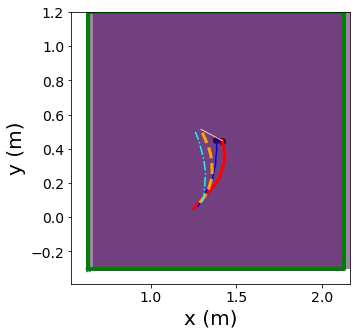

[1.2494934  0.05069732 1.2835345  0.08657888 1.3166137  0.12412815 1.3501829  0.16125728 1.3818209  0.20000026 1.4071461  0.24311076 1.4205825  0.29103497 1.4309464  0.33997965 1.4287945  0.38956183 1.418814   0.43849686 1.4165944  0.44822982]
119 22


In [31]:
negative_free_space = 0
positive_free_space = 0
j = 0
for i, example in enumerate(test_tf_dataset):
    res = example['resolution'].numpy().squeeze()
    res = np.array([res, res])
    planned_local_env = example['planned_local_env/env'].numpy().squeeze()
    planned_local_env_extent = example['planned_local_env/extent'].numpy().squeeze()
    planned_local_env_origin = example['planned_local_env/origin'].numpy().squeeze()
    actual_local_env = example['actual_local_env/env'].numpy().squeeze()
    actual_local_env_extent = example['actual_local_env/extent'].numpy().squeeze()
    state = example['state'].numpy().squeeze()
    action = example['action'].numpy().squeeze()
    next_state = example['state_next'].numpy().squeeze()
    planned_state = example['planned_state'].numpy().squeeze()
    planned_next_state = example['planned_state_next'].numpy().squeeze()
    label = example['label'].numpy().squeeze()
    
    if planned_local_env.sum() == 0 and label == 1:
        if j < 10:
            plt.figure(figsize=(5,5))
            ax = plt.gca()
            plot_classifier_data(ax=ax,
                                 next_state=next_state,
                                 action=action,
                                 planned_next_state=planned_next_state,
                                 planned_env=planned_local_env,
                                 planned_env_extent=planned_local_env_extent,
                                 planned_state=planned_state,
                                 planned_env_origin=planned_local_env_origin,
                                 res=res,
                                 state=state,
                                 actual_env=actual_local_env,
                                 actual_env_extent=actual_local_env_extent,
                                 label=label)
            plt.show()
            print(state)
            j += 1
        
    if planned_local_env.sum() == 0 :
        if label == 0:
            negative_free_space += 1
        if label == 1:
            positive_free_space += 1

print(negative_free_space, positive_free_space)

In [7]:
example = next(iter(test_tf_dataset))

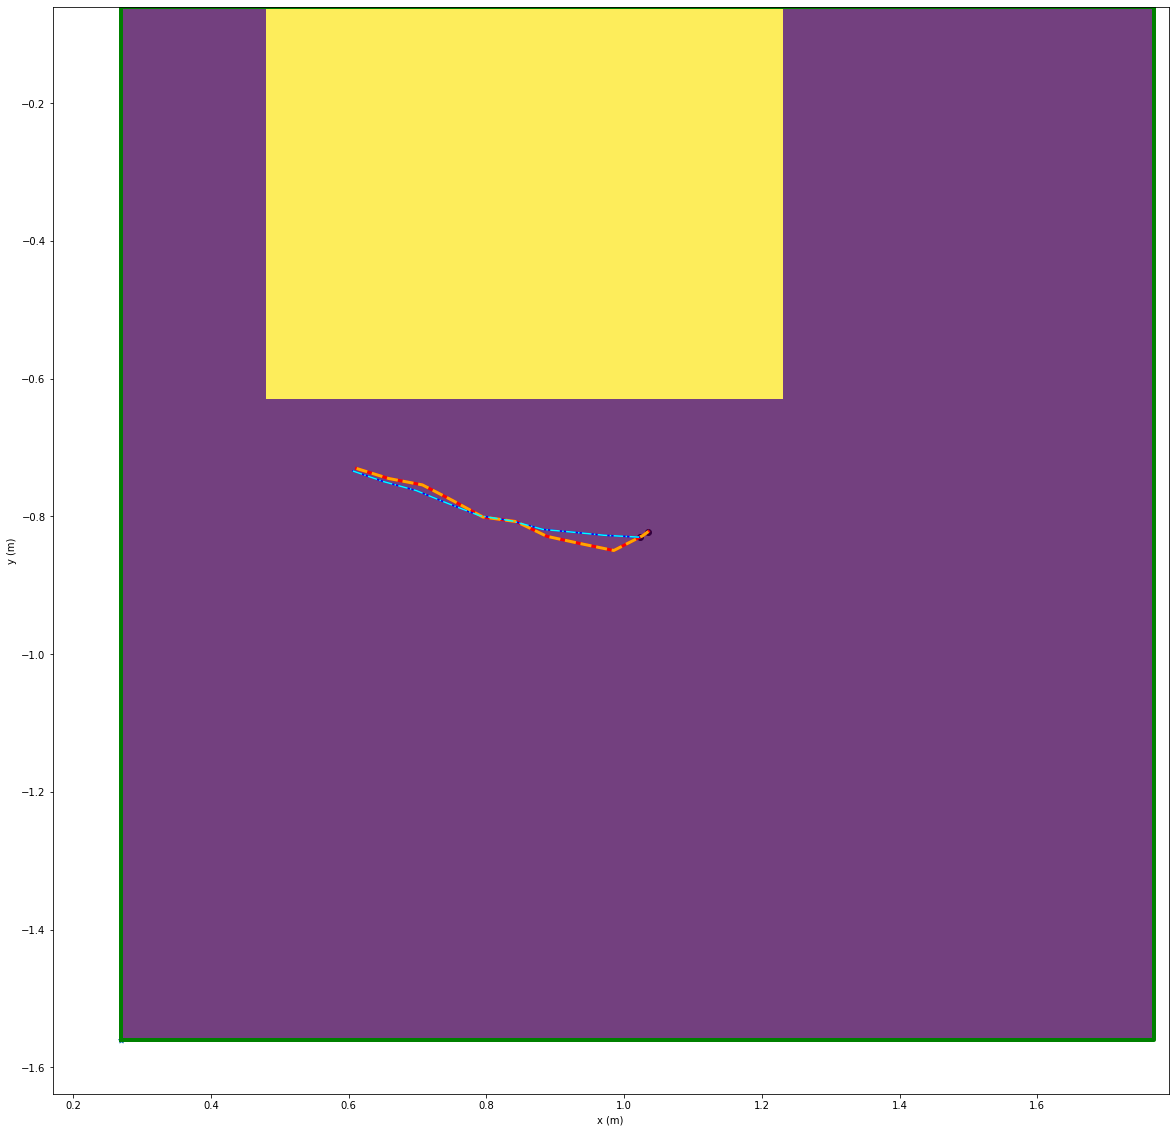

In [8]:
res = example['resolution'].numpy().squeeze()
res = np.array([res, res])
planned_local_env = example['planned_local_env/env'].numpy().squeeze()
planned_local_env_extent = example['planned_local_env/extent'].numpy().squeeze()
planned_local_env_origin = example['planned_local_env/origin'].numpy().squeeze()
actual_local_env = example['actual_local_env/env'].numpy().squeeze()
actual_local_env_extent = example['actual_local_env/extent'].numpy().squeeze()
state = example['state'].numpy().squeeze()
action = example['action'].numpy().squeeze()
next_state = example['state_next'].numpy().squeeze()
planned_state = example['planned_state'].numpy().squeeze()
planned_next_state = example['planned_state_next'].numpy().squeeze()
label = example['label'].numpy().squeeze()


plt.figure(figsize=(20,20))
ax = plt.gca()
plot_classifier_data(ax=ax,
                     next_state=next_state,
                     action=action,
                     planned_next_state=planned_next_state,
                     planned_env=planned_local_env,
                     planned_env_extent=planned_local_env_extent,
                     planned_state=planned_state,
                     planned_env_origin=planned_local_env_origin,
                     res=res,
                     state=state,
                     actual_env=actual_local_env,
                     actual_env_extent=actual_local_env_extent,
                     label=label)
plt.show()

In [16]:
i1_, i2_, env, p = net(example)

(50, 50, 11)


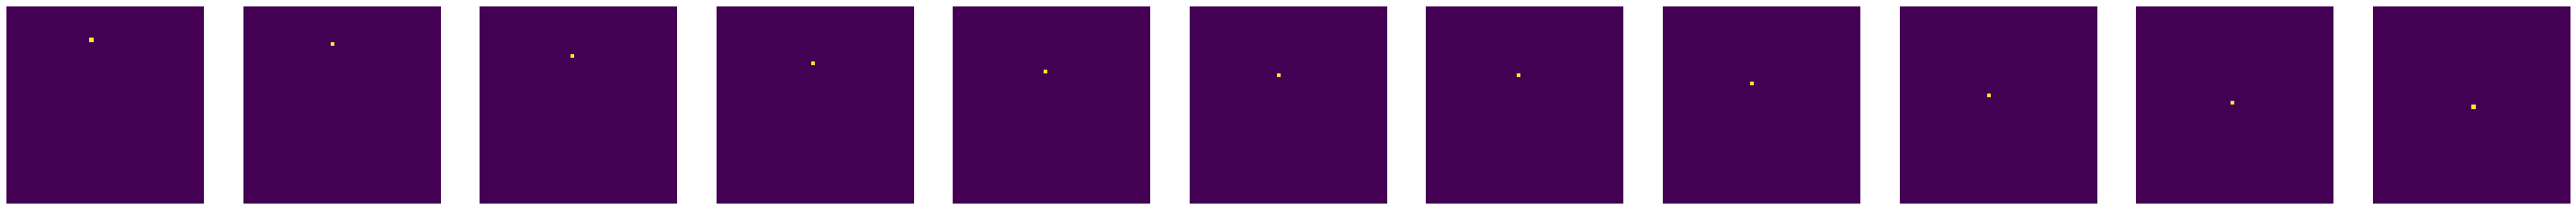

In [17]:
i1 = i1_.numpy().squeeze()
i2 = i2_.numpy().squeeze()
n_channels = i1.shape[2]
print(i1.shape)
fig, axes = plt.subplots(1, n_channels, figsize=(50,10))
for channel in range(n_channels):
    axes[channel].imshow(np.flipud(i1[:, :, channel]), aspect='equal')
    axes[channel].set_xticks([])
    axes[channel].set_yticks([])
    axes[channel].axis("off")

In [27]:
planned_rope_image, planned_next_rope_image, planned_local_env, concat_image_ = net._image(example)
concat_image = concat_image_.numpy().squeeze()

In [28]:
concat_image.shape

(50, 50, 23)

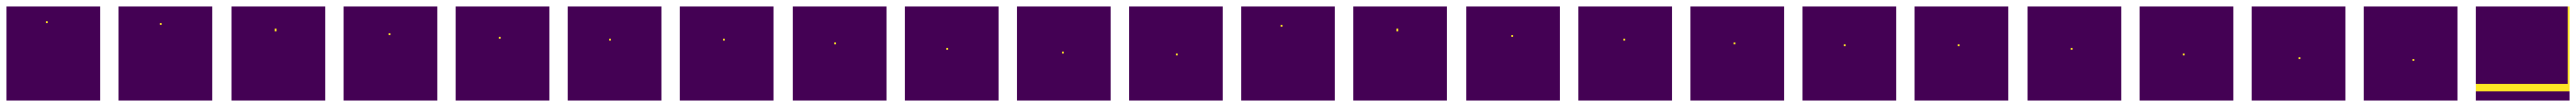

In [29]:
n_channels = concat_image.shape[2]
fig, axes = plt.subplots(1, n_channels, figsize=(50,10))
for channel in range(n_channels):
    axes[channel].imshow(np.flipud(concat_image[:, :, channel]), aspect='equal')
    axes[channel].set_xticks([])
    axes[channel].set_yticks([])
    axes[channel].axis("off")

2.0

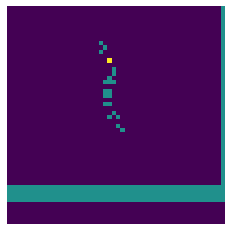

In [34]:
plt.figure()
ax = plt.gca()
i_combined = np.sum(concat_image, axis=2)
plt.imshow(np.flipud(i_combined), aspect='equal')
ax.set_xticks([])
ax.set_yticks([])
plt.axis("off");
np.max(i_combined)

In [35]:
conv_z_ = net._conv(concat_image_)
conv_z = conv_z_.numpy().squeeze()

In [36]:
conv_z.shape

(24, 24)

In [37]:
print(np.max(conv_z))
print(np.min(conv_z))

0.6768523
0.0


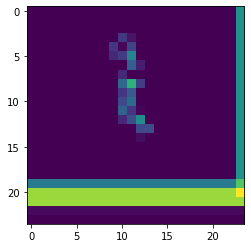

In [40]:
plt.imshow(np.flipud(conv_z));

In [39]:
tf.sigmoid(conv_z.flatten() @ linear_w).numpy()[0] > 0.5

False